# Random Forest Model

--------------------
## Standard Scaler (Base Model)

Bentuk data latih setelah SMOTE: (7776, 16)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model Random Forest Standard Scaler =====

Confusion Matrix:
[[949  23]
 [ 42   8]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       972
           1       0.26      0.16      0.20        50

    accuracy                           0.94      1022
   macro avg       0.61      0.57      0.58      1022
weighted avg       0.92      0.94      0.93      1022


Skor AUC-ROC: 0.7685


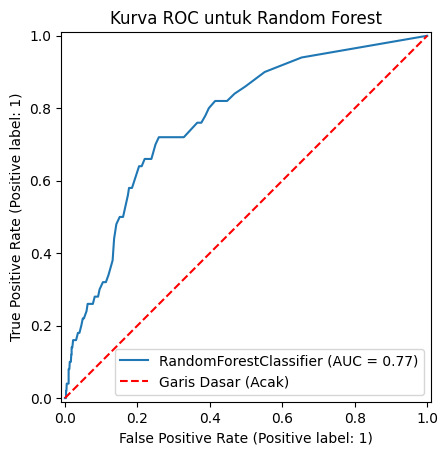

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model Random Forest
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
model_rf.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_proba_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model Random Forest Standard Scaler =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nSkor AUC-ROC: {auc_score_rf:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model_rf, X_test_scaled, y_test)
plt.title('Kurva ROC untuk Random Forest')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()

--------------------
## No Scaling

Bentuk data latih setelah SMOTE: (7776, 16)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model Random Forest No Scaling =====

Confusion Matrix:
[[935  37]
 [ 46   4]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.10      0.08      0.09        50

    accuracy                           0.92      1022
   macro avg       0.53      0.52      0.52      1022
weighted avg       0.91      0.92      0.91      1022


Skor AUC-ROC: 0.7557


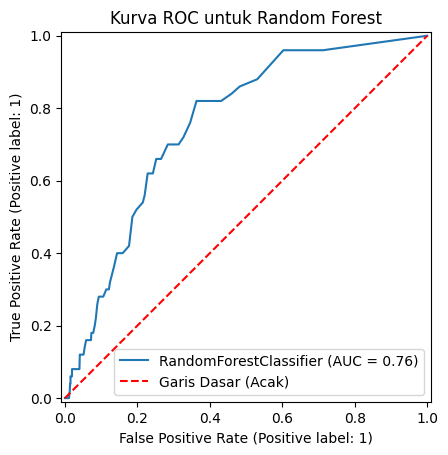

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model Random Forest
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
model_rf.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model Random Forest No Scaling =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nSkor AUC-ROC: {auc_score_rf:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model_rf, X_test, y_test)
plt.title('Kurva ROC untuk Random Forest')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()

--------------------
## MinMax Scaler

Bentuk data latih setelah SMOTE: (7776, 16)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model Random Forest MinMax Scaler =====

Confusion Matrix:
[[918  54]
 [ 40  10]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.16      0.20      0.18        50

    accuracy                           0.91      1022
   macro avg       0.56      0.57      0.56      1022
weighted avg       0.92      0.91      0.91      1022


Skor AUC-ROC: 0.7605


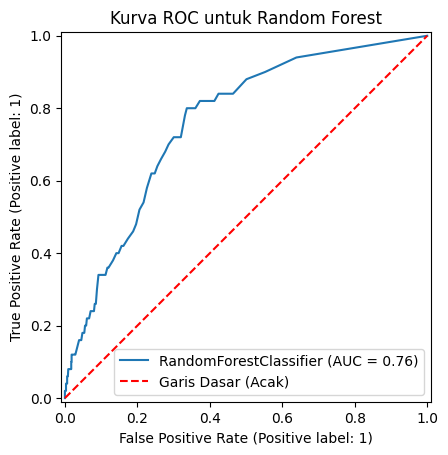

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model Random Forest
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
model_rf.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_proba_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model Random Forest MinMax Scaler =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nSkor AUC-ROC: {auc_score_rf:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model_rf, X_test_scaled, y_test)
plt.title('Kurva ROC untuk Random Forest')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()

--------------------
## Hyperparameter

Bentuk data latih setelah SMOTE: (7776, 16)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model Random Forest Hyperparameter =====

Confusion Matrix:
[[949  23]
 [ 42   8]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       972
           1       0.26      0.16      0.20        50

    accuracy                           0.94      1022
   macro avg       0.61      0.57      0.58      1022
weighted avg       0.92      0.94      0.93      1022


Skor AUC-ROC: 0.7752


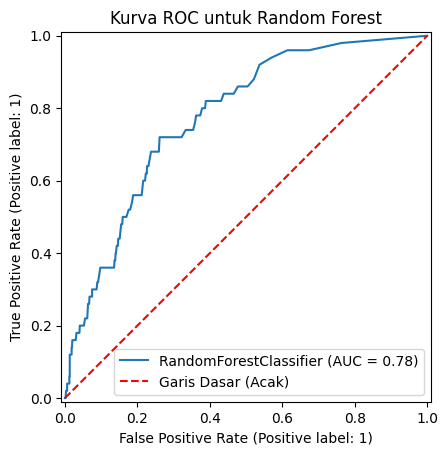

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model Random Forest dengan parameter yang sudah ditentukan
model_rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',   # Menangani ketidakseimbangan kelas
    max_depth=None,            # Kedalaman pohon tidak dibatasi
    max_features='sqrt',       # Memilih fitur sebanyak akar kuadrat dari jumlah total fitur
    min_samples_leaf=1,        # Setiap daun harus memiliki minimal satu sampel
    min_samples_split=2,       # Setiap simpul harus memiliki minimal dua sampel untuk membagi
    n_estimators=300,          # Gunakan 300 pohon
    n_jobs=-1                  # Gunakan semua core CPU untuk mempercepat proses
)

model_rf.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_proba_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model Random Forest Hyperparameter =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nSkor AUC-ROC: {auc_score_rf:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model_rf, X_test_scaled, y_test)
plt.title('Kurva ROC untuk Random Forest')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()


--------------------
### Feature Engineering

Bentuk data latih setelah SMOTE: (7776, 19)
Distribusi kelas target setelah SMOTE:
 stroke
0    3888
1    3888
Name: count, dtype: int64

===== Hasil Evaluasi Model Random Forest Feature Engineered =====

Confusion Matrix:
[[972   0]
 [  1  49]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       972
           1       1.00      0.98      0.99        50

    accuracy                           1.00      1022
   macro avg       1.00      0.99      0.99      1022
weighted avg       1.00      1.00      1.00      1022


Skor AUC-ROC: 1.0000


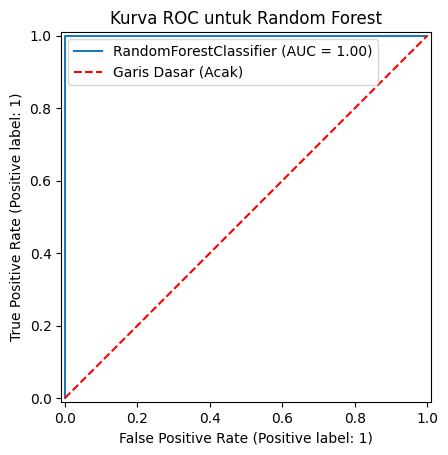

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('stroke-data-feat-eng-one-hot-revised.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE) pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Bentuk data latih setelah SMOTE:", X_train_resampled.shape)
print("Distribusi kelas target setelah SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Latih Model Random Forest
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
model_rf.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_proba_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model Random Forest Feature Engineered =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nSkor AUC-ROC: {auc_score_rf:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(model_rf, X_test_scaled, y_test)
plt.title('Kurva ROC untuk Random Forest')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()